# Over Sampling系を試す
down sampling系のauc
- ベース : 0.876959459459
- sample weight :0.879684684685
- down sampling : 0.899617117117
- down sampling + bagging : 0.906846846847
- bagging : 0.895315315315

In [51]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [52]:
def my_plot(true_label, pred_proba):
    print('auc : ', roc_auc_score(true_label, pred_proba))
    fpr, tpr, thresholds = roc_curve(y_va, pred_va_proba, pos_label=1)
    plt.plot(fpr, tpr)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title("ROC curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.show()

target = 1 : 250
target = 0 : 3750


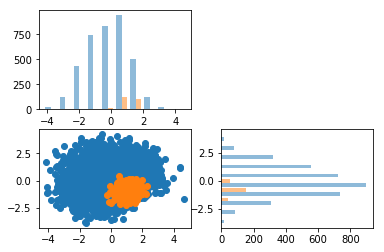

tr_pos : 190
tr_neg : 3010
va_pos : 60
va_neg : 740
pos:neg = 1:15


In [53]:
data = np.loadtxt('Book1.csv', skiprows=1, delimiter=',')
X = data[:, :2]
y = data[:, -1]
print('target = 1 :', sum(y==1))
print('target = 0 :', sum(y==0))
plt.subplot(223)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.subplot(221)
plt.hist((X[y==0, 0], X[y==1, 0]), alpha=0.5) 
plt.subplot(224)
plt.hist((X[y==0, 1], X[y==1, 1]), alpha=0.5, orientation='horizontal')
plt.show()
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=71)
print(f'tr_pos : {int(sum(y_tr))}')
print(f'tr_neg : {int(len(y_tr)-sum(y_tr))}')
print(f'va_pos : {int(sum(y_va))}')
print(f'va_neg : {int(len(y_va)-sum(y_va))}')
print(f'pos:neg = 1:{int((int(len(y)-sum(y)))/sum(y))}')

# Random Over Sampling

In [54]:
from imblearn import over_sampling
n_tr_by_class = 3010
ros = over_sampling.RandomOverSampler(ratio={0:n_tr_by_class, 1: n_tr_by_class}, random_state=71)
X_tr_resampled, y_tr_resampled = ros.fit_sample(X_tr, y_tr)

target = 1 : 3010
target = 0 : 3010


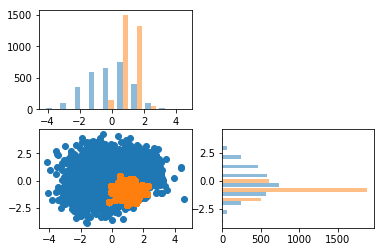

In [55]:
data = np.loadtxt('Book1.csv', skiprows=1, delimiter=',')
print('target = 1 :', sum(y_tr_resampled==1))
print('target = 0 :', sum(y_tr_resampled==0))
plt.subplot(223)
plt.scatter(X_tr_resampled[y_tr_resampled==0, 0], X_tr_resampled[y_tr_resampled==0, 1])
plt.scatter(X_tr_resampled[y_tr_resampled==1, 0], X_tr_resampled[y_tr_resampled==1, 1])
plt.subplot(221)
plt.hist((X_tr_resampled[y_tr_resampled==0, 0], X_tr_resampled[y_tr_resampled==1, 0]), alpha=0.5) 
plt.subplot(224)
plt.hist((X_tr_resampled[y_tr_resampled==0, 1], X_tr_resampled[y_tr_resampled==1, 1]), alpha=0.5, orientation='horizontal')
plt.show()

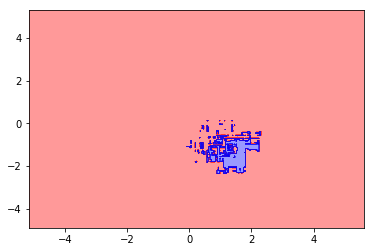

auc :  0.884358108108


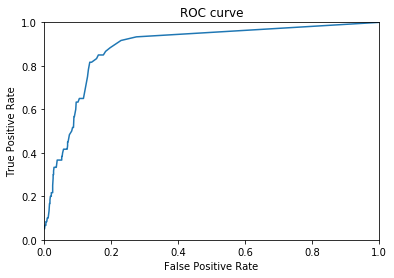

In [56]:
clf = RandomForestClassifier(100, random_state=71)
clf.fit(X_tr_resampled, y_tr_resampled)
pred_va = clf.predict(X_va)
plot_decision_regions(X, y, clf)
pred_va_proba = clf.predict_proba(X_va)[:, 1]
my_plot(y_va, pred_va_proba)

In [70]:
def plot1(x, target):
    plt.subplot(223)
    plt.scatter(x[target==0, 0], x[target==0, 1])
    plt.scatter(x[target==1, 0], x[target==1, 1])
    plt.subplot(221)
    plt.hist((x[target==0, 0], x[target==1, 0]), alpha=0.5) 
    plt.subplot(224)
    plt.hist((x[target==0, 1], x[target==1, 1]), alpha=0.5, orientation='horizontal')
    plt.show()

# SMOTE

regular


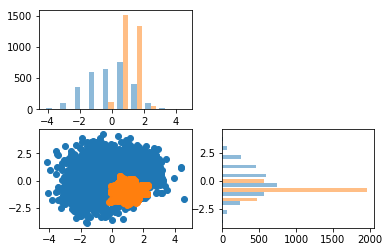

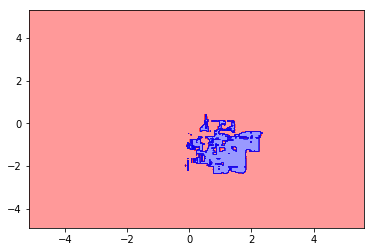

auc :  0.888322072072


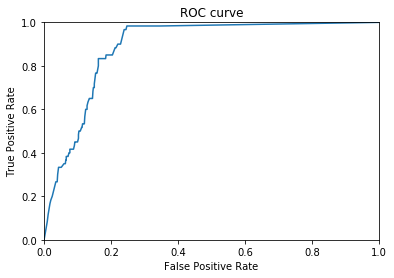

borderline1


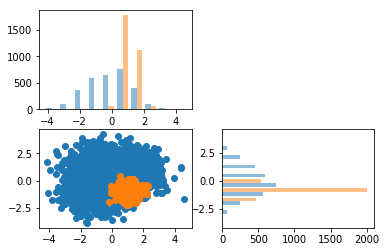

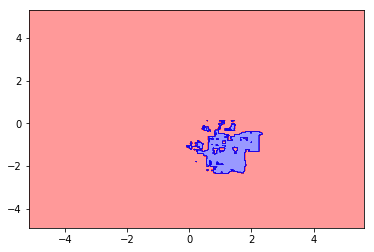

auc :  0.887173423423


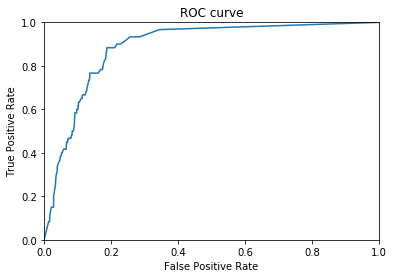

borderline2


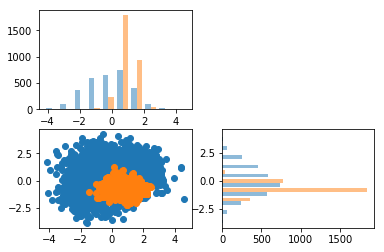

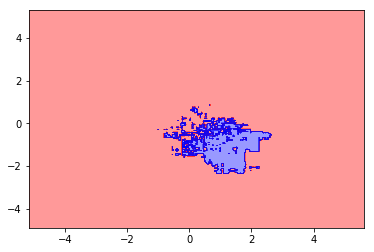

auc :  0.876295045045


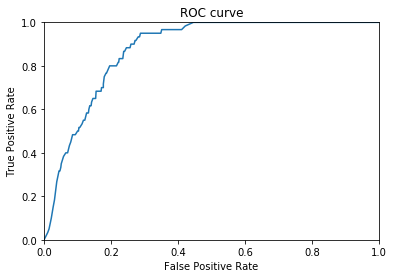

svm


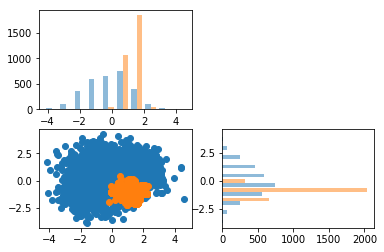

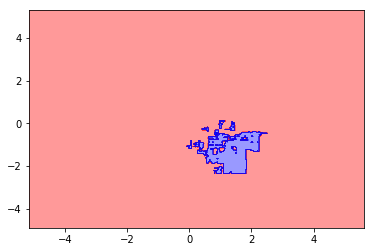

auc :  0.888412162162


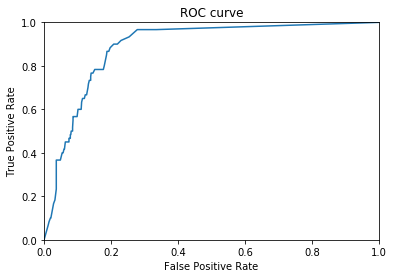

In [71]:
kind = ['regular', 'borderline1', 'borderline2', 'svm']
X_resampled = {}
y_resampled = {}    
for method in kind:
    sm = over_sampling.SMOTE(kind=method, random_state=71)
    X_res, y_res = sm.fit_sample(X_tr, y_tr)
    X_resampled[method] = X_res
    y_resampled[method] = y_res
    print(method)
    plot1(X_resampled[method], y_resampled[method])
    clf = RandomForestClassifier(100, random_state=71)
    clf.fit(X_resampled[method], y_resampled[method])
    pred_va = clf.predict(X_va)
    plot_decision_regions(X, y, clf)
    pred_va_proba = clf.predict_proba(X_va)[:, 1]
    my_plot(y_va, pred_va_proba)
    print('=========================================================')

In [79]:
k_neighbor = [1, 3, 5, 7]
m_neighbor = [5, 8, 10, 12,15]
kind = ['regular', 'borderline1', 'borderline2', 'svm']
X_resampled = {}
y_resampled = {}
res = []
for method in kind:
    for k in k_neighbor:
        for m in m_neighbor:
            sm = over_sampling.SMOTE(kind=method, random_state=71, k_neighbors=k, m_neighbors=m)
            X_res, y_res = sm.fit_sample(X_tr, y_tr)
            X_resampled[method] = X_res
            y_resampled[method] = y_res
            clf = RandomForestClassifier(100, random_state=71)
            clf.fit(X_resampled[method], y_resampled[method])
            pred_va = clf.predict(X_va)
#            plot_decision_regions(X, y, clf)
            pred_va_proba = clf.predict_proba(X_va)[:, 1]
            res.append([method, k, m, roc_auc_score(y_va, pred_va_proba)])


In [82]:
a = 0
for i in res:
    if i[-1]>a:
        print(i)
        a = i[-1]

['regular', 1, 5, 0.88188063063063082]
['regular', 5, 5, 0.88832207207207203]
['borderline1', 1, 8, 0.88950450450450458]
['borderline1', 1, 10, 0.89293918918918924]
['borderline1', 5, 5, 0.90097972972972973]
['svm', 1, 8, 0.90119369369369373]
['svm', 5, 5, 0.90200450450450465]


やらないよりましだけど、やっぱDS+BAGに及ばない
DS+BAGもチューニングする？めんどい

# ADASYN

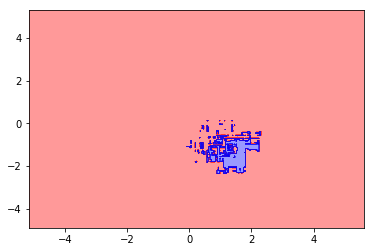

auc :  0.884358108108


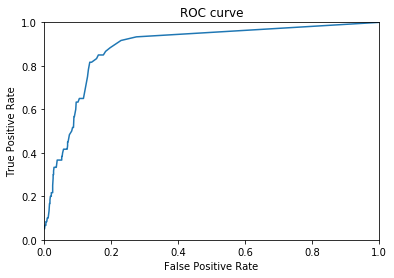

In [97]:
ada = over_sampling.ADASYN(random_state=71)
X_resampled, y_resampled = ada.fit_sample(X_tr, y_tr)
clf = RandomForestClassifier(100, random_state=71)
clf.fit(X_tr_resampled, y_tr_resampled)
pred_va = clf.predict(X_va)
plot_decision_regions(X, y, clf)
pred_va_proba = clf.predict_proba(X_va)[:, 1]
my_plot(y_va, pred_va_proba)

# Over + Down Sampling + Bagging

In [109]:
def ds_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    return Z
def ds_plot_decision_regions(X, y, Z, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.show()

In [105]:
X_tr_pos = X_tr[y_tr==1]
X_tr_neg = X_tr[y_tr==0]
y_tr_pos = np.ones(len(X_tr_pos))
y_tr_neg = np.zeros(len(X_tr_neg))

In [121]:
n_neg_tr = 200
n_bagging = 10
preds_proba = np.zeros([len(X_va), n_bagging])
Z = []
for i in range(n_bagging):
    np.random.seed(i)
    np.random.shuffle(X_tr_neg)
    X_tr_ds = np.vstack([X_tr_pos, X_tr_neg[:n_neg_tr]])
    y_tr_ds = np.vstack([y_tr_pos.reshape(-1, 1), y_tr_neg[:n_neg_tr].reshape(-1, 1)]).reshape(-1)
    sm = over_sampling.SMOTE(kind='svm', random_state=71, k_neighbors=5, m_neighbors=5)
    X_tr_ds, y_tr_ds = sm.fit_sample(X_tr_ds, y_tr_ds)
    clf = RandomForestClassifier(100, random_state=i)
    clf.fit(X_tr_ds, y_tr_ds)
    preds_proba[:, i] = clf.predict_proba(X_va)[:, 1]
    Z.append(ds_decision_regions(X, y, clf))
preds_proba = preds_proba.mean(axis=1)

auc :  0.911813063063


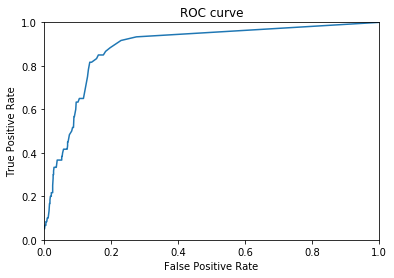

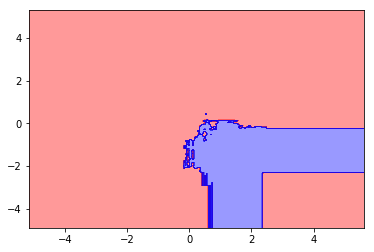

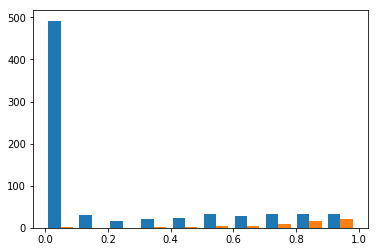

(0, 50)

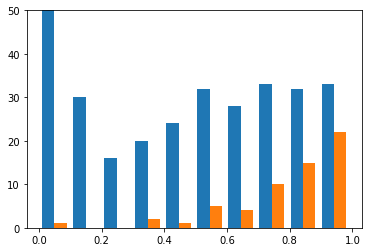

In [122]:
my_plot(y_va, preds_proba)
a = Z[0]
for i in range(1, len(Z)):
    a += Z[i]
a /= n_bagging
a[a<0.5] = 0
a[a>=0.5] = 1
ds_plot_decision_regions(X, y, a)
plt.hist((preds_proba[y_va==0], preds_proba[y_va==1]), bins=10)
plt.show()
plt.hist((preds_proba[y_va==0], preds_proba[y_va==1]), bins=10)
plt.ylim(0, 50)

ds+bag上回ったけど、チューニングした結果だから、う～んって感じ。

## まとめ
# Down Sampling + Baggingが(コスパ)最強
- dsもいろいろ手法試してみよ
- もうちょい調べて、kaggle参戦したい

- ベース : 0.876959459459
- sample weight :0.879684684685
- down sampling : 0.899617117117
- down sampling + bagging : 0.906846846847
- bagging : 0.895315315315

- random over sampling : 0.884358108108
- smote : 0.888322072072
- smote(チューニング) : 0.90200450450450465
- over, down, bag : 0.911813063063
